In [2]:
import pandas
import numpy
import seaborn 
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [3]:
# df_train = pandas.read_csv("./data/train.csv", infer_datetime_format=True, parse_dates=True)
# df_features = pandas.read_csv("./data/features.csv", infer_datetime_format=True, parse_dates=True)
# df_stores = pandas.read_csv("./data/stores.csv")

df_train = pandas.read_csv("./data/train.csv")
df_features = pandas.read_csv("./data/features.csv")
df_stores = pandas.read_csv("./data/stores.csv")
df_test = pandas.read_csv("./data/test.csv")

In [4]:
df_train.shape, df_features.shape, df_stores.shape, df_test.shape

((421570, 5), (8190, 12), (45, 3), (115064, 4))

In [5]:
df_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [6]:
df_features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [7]:
df_stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [8]:
# Merge Features dataset with train dataset
merged_df = pandas.merge(df_train, df_features,on=['Date', "IsHoliday", "Store"], how="inner")
merge_test = pandas.merge(df_test, df_features, on=['Date', "IsHoliday", "Store"], how="inner")
merged_df.shape, merge_test.shape

((421570, 14), (115064, 13))

In [9]:
merged_df = pandas.merge(merged_df, df_stores,on=["Store"], how="inner")
merge_test = pandas.merge(merge_test, df_stores, on=["Store"], how="inner")
merged_df.shape, merge_test.shape

((421570, 16), (115064, 15))

In [10]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  Type          421570 non-null  object 
 15  Size          421570 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


In [11]:
merged_df.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,136727.915739
std,12.785297,30.492054,22711.183519,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,60980.583328
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,140167.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


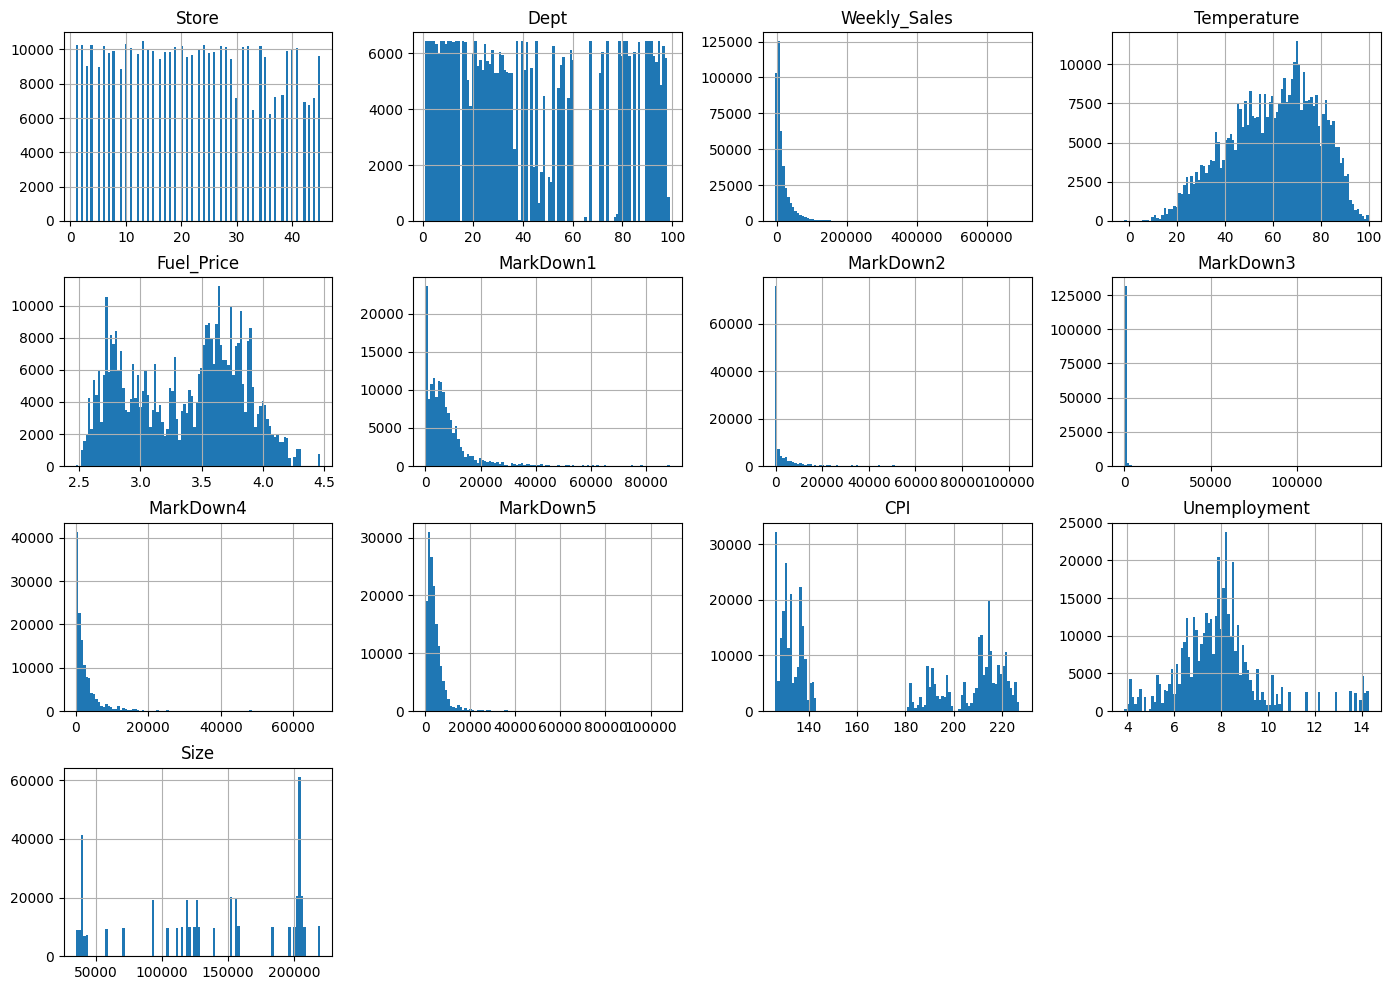

In [12]:
merged_df.hist(bins=100, figsize=(17, 12))
plt.show()

In [13]:
negative_sales = merged_df[merged_df["Weekly_Sales"] < 0]
negative_sales.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,481.000000,330.000000,424.000000,432.000000,484.000000,1285.000000,1285.000000,1285.000000
mean,23.858366,49.999222,-68.608218,59.954078,3.406292,6821.195031,4918.016697,741.035307,2900.351389,4472.117583,167.864301,8.029536,129645.725292
std,12.033126,24.394330,231.664245,18.346794,0.453768,7745.309031,13652.405534,6361.180096,5470.741542,6850.274900,38.032214,1.662948,56461.302600
min,1.000000,5.000000,-4988.940000,-2.060000,2.514000,2.120000,-192.000000,-0.200000,0.410000,164.080000,126.064000,4.125000,34875.000000
25%,15.000000,31.000000,-41.000000,46.650000,2.976000,2095.310000,36.007500,4.965000,516.770000,1730.175000,132.751667,7.057000,93638.000000
50%,22.000000,47.000000,-13.200000,62.170000,3.506000,5430.750000,211.975000,22.840000,1303.340000,3019.005000,142.017793,8.067000,123737.000000
75%,35.000000,59.000000,-4.940000,73.400000,3.787000,8708.200000,2101.825000,102.700000,3301.810000,5428.080000,211.006754,8.744000,196321.000000
max,45.000000,99.000000,-0.020000,95.910000,4.468000,65021.230000,97740.990000,101378.790000,52739.020000,108519.280000,226.968844,14.313000,219622.000000


In [14]:
negative_sales["Date"] = pandas.to_datetime(negative_sales["Date"],infer_datetime_format=True)
negative_sales.set_index(keys="Date", inplace=True)

/home/vhyne/anaconda3/envs/TF-py/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


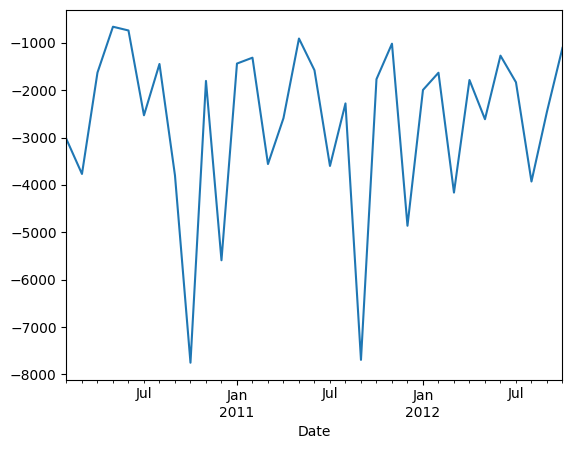

In [15]:
negative_sales_resample = negative_sales.resample("M").sum()
negative_sales_resample.Weekly_Sales.plot()
plt.show()

In [16]:
def extract_date(df: pandas.DataFrame):
    df["Date"] = pandas.to_datetime(df["Date"], infer_datetime_format=True)
    df['year'] = df.Date.dt.year
    df["month"] = df.Date.dt.month
    df["week"] = df.Date.dt.isocalendar().week
    df.set_index(keys="Date", inplace=True)
    df.fillna(0, inplace=True)

In [17]:
extract_date(merged_df)

In [18]:
holidays = ["2010-02-12", "2011-02-11", "2012-02-10", "2013-02-08",
            "2010-09-10", "2011-09-09", "2012-09-07", "2013-09-06",
            "2010-11-26", "2011-11-25", "2012-11-23", "2013-11-23",
            "2010-12-31", "2011-12-30", "2012-12-28", "2013-12-27"]

In [19]:
def set_holidays(df):
    df["AHoliday"] = False
    for holiday in holidays:
        df.loc[holiday, "AHoliday"] = True


def map_type_cat(df: pandas.DataFrame):
    df["Type"] = df["Type"].map({
        "A": 1,
        "B": 2,
        "C": 3
    })

In [20]:
set_holidays(merged_df)
# map_type_cat(merged_df)

In [21]:
merged_df.head(10)

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,year,month,week,AHoliday
Date,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,2010,2,5,False
2010-02-05,1,2,50605.27,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,2010,2,5,False
2010-02-05,1,3,13740.12,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,2010,2,5,False
2010-02-05,1,4,39954.04,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,2010,2,5,False
2010-02-05,1,5,32229.38,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,2010,2,5,False
2010-02-05,1,6,5749.03,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,2010,2,5,False
2010-02-05,1,7,21084.08,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,2010,2,5,False
2010-02-05,1,8,40129.01,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,2010,2,5,False
2010-02-05,1,9,16930.99,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,2010,2,5,False


In [22]:
merged_df.describe(include="all")

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,year,month,week,AHoliday
count,421570.000000,421570.000000,421570.000000,421570,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570,421570.000000,421570.000000,421570.000000,421570.000000,421570
unique,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,NaN,NaN,NaN,NaN,False
freq,NaN,NaN,NaN,391909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,215478,NaN,NaN,NaN,NaN,391909
mean,22.200546,44.260317,15981.258123,NaN,60.090059,3.361027,2590.074819,879.974298,468.087665,1083.132268,1662.772385,171.201947,7.960289,NaN,136727.915739,2010.968591,6.449510,25.826762,NaN
std,12.785297,30.492054,22711.183519,NaN,18.447931,0.458515,6052.385934,5084.538801,5528.873453,3894.529945,4207.629321,39.159276,1.863296,NaN,60980.583328,0.796876,3.243217,14.151887,NaN
min,1.000000,1.000000,-4988.940000,NaN,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,NaN,34875.000000,2010.000000,1.000000,1.000000,NaN
25%,11.000000,18.000000,2079.650000,NaN,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,NaN,93638.000000,2010.000000,4.000000,14.000000,NaN
50%,22.000000,37.000000,7612.030000,NaN,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.318780,7.866000,NaN,140167.000000,2011.000000,6.000000,26.000000,NaN
75%,33.000000,74.000000,20205.852500,NaN,74.280000,3.738000,2809.050000,2.200000,4.540000,425.290000,2168.040000,212.416993,8.572000,NaN,202505.000000,2012.000000,9.000000,38.000000,NaN


In [23]:
merged_df["IsHoliday"].value_counts(), merged_df["AHoliday"].value_counts()

(False    391909
 True      29661
 Name: IsHoliday, dtype: int64,
 False    391909
 True      29661
 Name: AHoliday, dtype: int64)

In [24]:
truth_value_holiday = merged_df[merged_df.AHoliday == True]
truth_value_holiday["Sales_Holidays"] = truth_value_holiday["Weekly_Sales"]
truth_value_holiday.reset_index(inplace=True)
merged_df.reset_index(inplace=True)

/home/vhyne/anaconda3/envs/TF-py/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [25]:
sales_holiday = truth_value_holiday[["Date","Store","Dept", "Sales_Holidays"]]
sales_holiday.head()

,Date,Store,Dept,Sales_Holidays
0,2010-02-12,1,1,46039.49
1,2010-02-12,1,2,44682.74
2,2010-02-12,1,3,10887.84
3,2010-02-12,1,4,35351.21
4,2010-02-12,1,5,29620.81


In [26]:
merged_df_2 = pandas.merge(merged_df, sales_holiday, on=['Date', "Store", "Dept"], how="outer")

In [27]:
merged_df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Date            421570 non-null  datetime64[ns]
 1   Store           421570 non-null  int64         
 2   Dept            421570 non-null  int64         
 3   Weekly_Sales    421570 non-null  float64       
 4   IsHoliday       421570 non-null  bool          
 5   Temperature     421570 non-null  float64       
 6   Fuel_Price      421570 non-null  float64       
 7   MarkDown1       421570 non-null  float64       
 8   MarkDown2       421570 non-null  float64       
 9   MarkDown3       421570 non-null  float64       
 10  MarkDown4       421570 non-null  float64       
 11  MarkDown5       421570 non-null  float64       
 12  CPI             421570 non-null  float64       
 13  Unemployment    421570 non-null  float64       
 14  Type            421570 non-null  obj

In [28]:
merged_df_2.set_index(keys="Date", inplace=True)

/home/vhyne/anaconda3/envs/TF-py/lib/python3.7/site-packages/pandas/core/indexing.py:862: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  return getattr(section, self.name)[new_key]


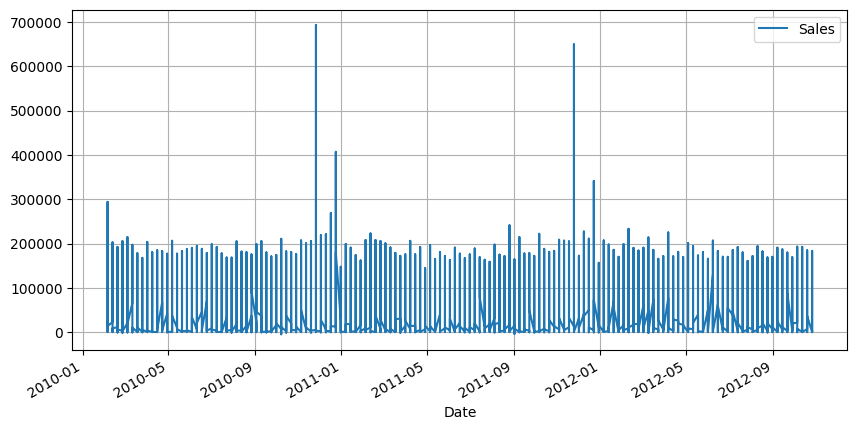

In [29]:
entire_store = merged_df_2.copy()
entire_store.loc["2010":"2012",'Weekly_Sales'].plot(figsize=(10, 5), label="Sales")
plt.grid()
plt.legend()
plt.show()

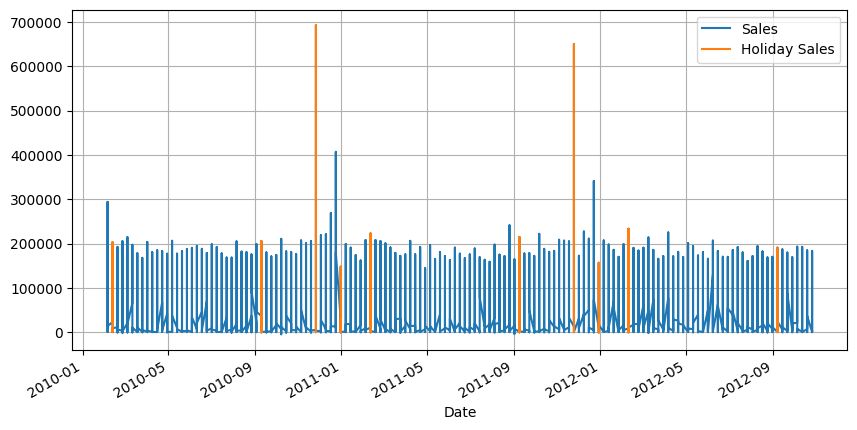

In [30]:
entire_store.loc["2010":"2012",'Weekly_Sales'].plot(figsize=(10, 5), label="Sales")
entire_store.loc["2010":"2012",'Sales_Holidays'].plot(figsize=(10, 5), label="Holiday Sales")
plt.grid()
plt.legend()
plt.show()

In [31]:
# for n in range(1,4):
#     store_one = merged_df[(merged_df.Store == 1) & (merged_df.Dept == n)]
#     store_one.loc["2010":"2012",'Weekly_Sales'].plot(figsize=(15, 8), label=f"s{n}")
# store_one.loc["2010":"2012",'AHoliday'].plot()
# plt.legend()
# plt.show()

In [32]:
df_columns = merged_df_2.columns

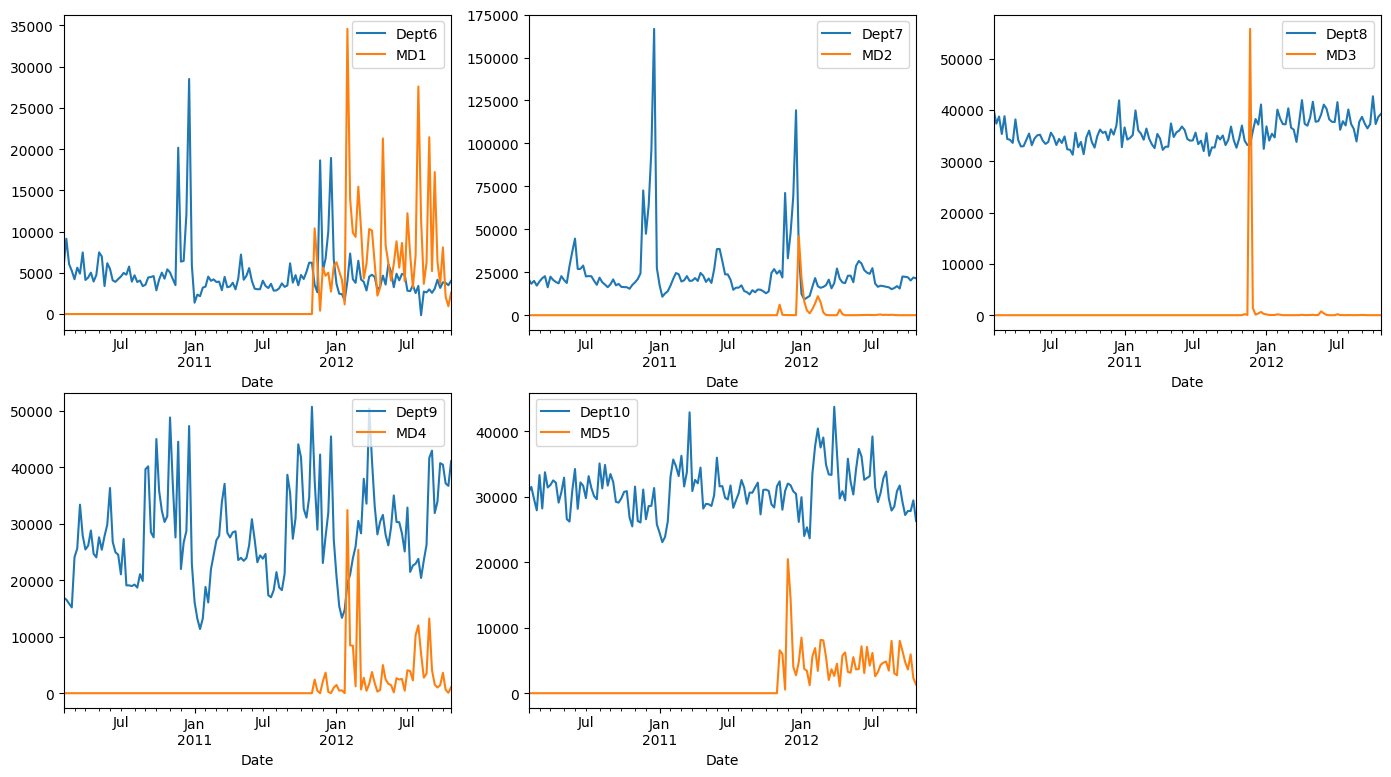

In [33]:
for n in range(6,11):
    ax = plt.subplot(2,3,n-5)
    store_one = merged_df_2[(merged_df_2.Store == 1) & (merged_df_2.Dept == n)]
    store_one.loc["2010":"2012",'Weekly_Sales'].plot(figsize=(17,9),label=f"Dept{n}", ax=ax)
    store_one.loc["2010":"2012",df_columns[n]].plot(label=f"MD{n-5}", ax=ax)
    plt.legend()
plt.show()

In [34]:
average_sales_hols = merged_df_2.groupby(["IsHoliday", "Store"]).mean()
average_sales_hols.head(20)

Dept  Weekly_Sales  Temperature  Fuel_Price  \
IsHoliday Store                                                     
False     1      44.380422  21609.634733    69.005361    3.228736   
          2      44.473413  26753.864227    68.919023    3.230048   
          3      41.029751   6332.098604    71.935826    3.229105   
          4      44.511262  29032.260570    63.142386    3.225938   
          5      41.270726   5010.249172    69.969895    3.231374   
          6      44.433614  21806.854728    70.389910    3.231011   
          7      44.352442   8254.246774    40.477588    3.252433   
          8      43.678552  13066.406406    63.403786    3.229458   
          9      40.069886   8723.575683    68.538641    3.234024   
          10     44.038474  26116.166656    72.859569    3.583578   
          11     44.554463  19185.338530    73.085585    3.232084   
          12     43.465861  14731.304140    70.894375    3.619417   
          13     44.612635  27261.146969    54.418176    3.296699   
          14     44.029453  28680.955485    58.559339    3.425745   
          15     44.000000   8920.611276    52.527965    3.586192   
          16     42.644698   7820.420632    45.912482    3.261627   
          17     43.573531  12862.113716    47.298996    3.300727   
          18     43.500273  15641.892529    54.069167    3.452619   
          19     44.903424  20233.689681    52.915796    3.584751   
          20     44.083553  29386.517928    56.144095    3.426834   

                   MarkDown1    MarkDown2   MarkDown3    MarkDown4  \
IsHoliday Store                                                      
False     1      2912.101231   532.687807   38.290189  1338.219037   
          2      3850.391899   928.159902   57.881904  1689.500941   
          3      1093.107808   193.022215   18.821678   321.409024   
          4      3422.210054   884.467999   88.637547  1821.331539   
          5      1091.992327   164.979013   17.402291   388.218430   
          6      2987.754055   667.153680   65.885270  1333.450046   
          7      2330.688802   327.139503   18.939121   621.865101   
          8      2524.100202   561.890013   42.263877   590.592284   
          9      1149.777928   177.611325   22.176822   344.640802   
          10     3488.523409   789.900522   94.042964  1564.249994   
          11     3199.435622   611.346239   63.922061  1289.413103   
          12     4012.251555   771.744665   50.326403  1848.697902   
          13     4010.266050  1240.831244  256.035009  1734.032835   
          14     4212.753997  1094.013925  111.847013  1504.932666   
          15     1940.287288   497.059010   74.199748   715.466974   
          16     1431.173757   180.706302   20.438623   415.044933   
          17     2118.024484   432.951623  142.090907   949.167293   
          18     3000.740946  1080.196546   58.137420  1411.204323   
          19     3808.365802   972.285283  125.678306  1708.905664   
          20     4116.191710  1121.288813  263.133317  1935.370262   

                   MarkDown5         CPI  Unemployment      Size         year  \
IsHoliday Store                                                                 
False     1      1816.800238  216.027762      7.602280  151315.0  2010.976158   
          2      2387.119998  215.686414      7.616454  202307.0  2010.978668   
          3       456.075774  219.435506      7.170159   37392.0  2010.977627   
          4      2372.883197  128.695485      5.952304  205863.0  2010.977894   
          5       928.742153  216.611029      6.289259   34875.0  2010.979543   
          6      2057.682793  217.597348      6.599861  202505.0  2010.979241   
          7      1293.626834  193.678833      8.577189   70713.0  2010.978393   
          8      2130.195985  219.473795      6.086463  155078.0  2010.976954   
          9      1309.602985  219.718908      6.089130  125833.0  2010.987018   
          10     1961.054553  128.678601      8.365133  126512.0  2010.

In [35]:
average_sales_hols.reset_index(inplace=True)

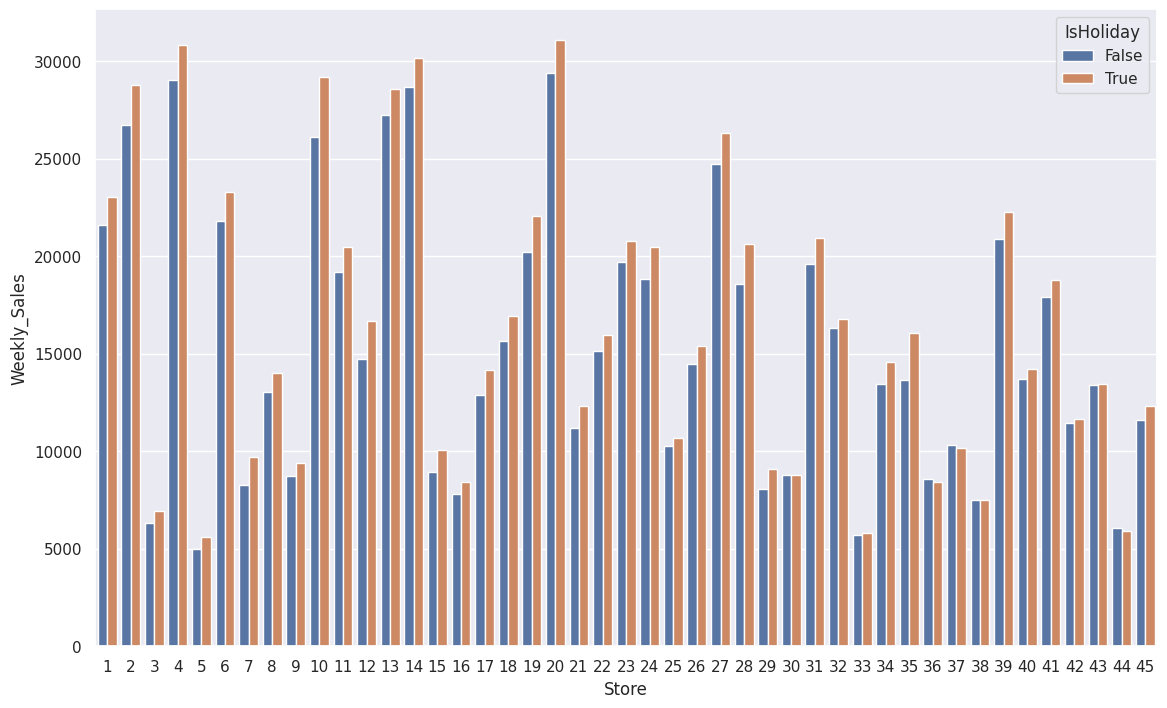

In [36]:
seaborn.set(rc={'figure.figsize':(13.7,8.27)})
seaborn.barplot(data=average_sales_hols, x="Store", y="Weekly_Sales", hue="IsHoliday")
plt.show()

In [37]:
def map_type_cat_reverse(df: pandas.DataFrame):
    df["Type"] = df["Type"].map({
        1: "A",
        2: "B",
        3: "C"
    })

In [38]:
# map_type_cat_reverse(entire_store)

In [39]:
average_sales_type = entire_store.groupby(["Type", "Store", "IsHoliday"]).mean()
# average_sales_type.head(20)

In [40]:
average_sales_type.reset_index(inplace=True)

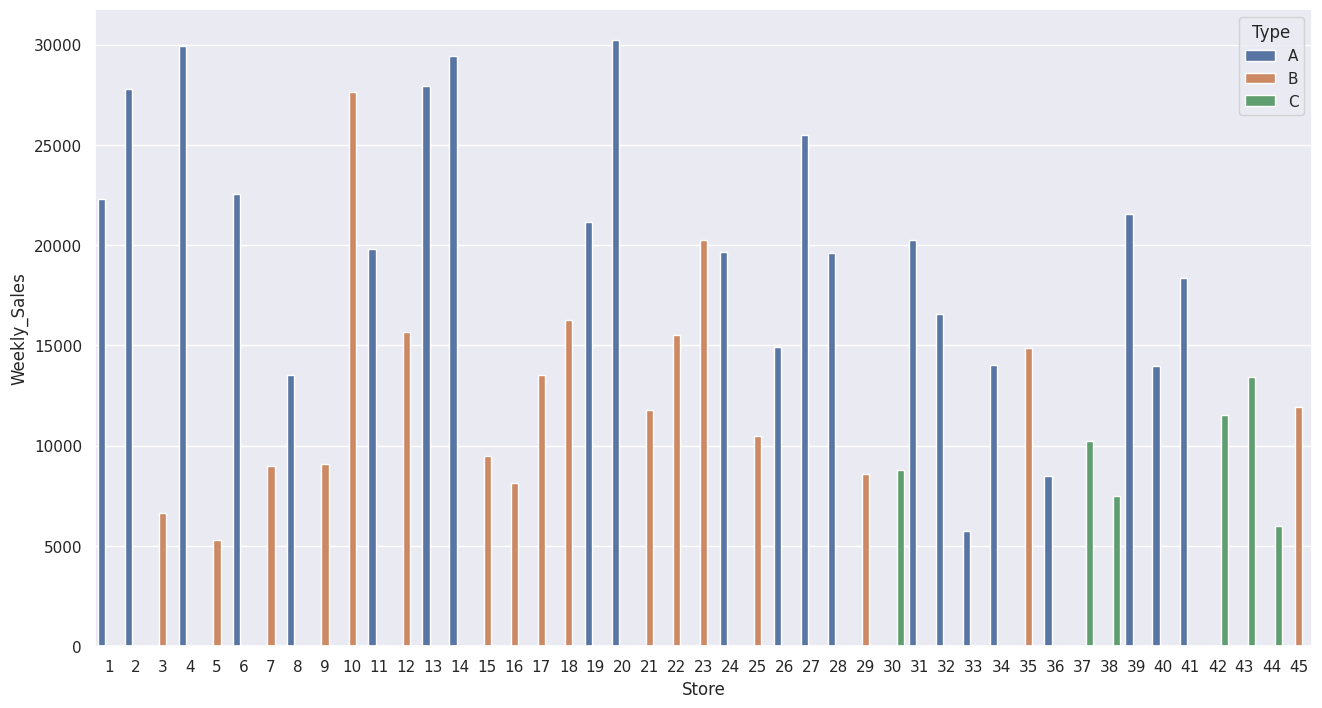

In [41]:
seaborn.set(rc={'figure.figsize':(15.7,8.27)})
seaborn.barplot(data=average_sales_type, x="Store", y="Weekly_Sales", hue="Type", errorbar=('ci', 0))
plt.show()

In [42]:
resam = merged_df_2.resample("M").mean()

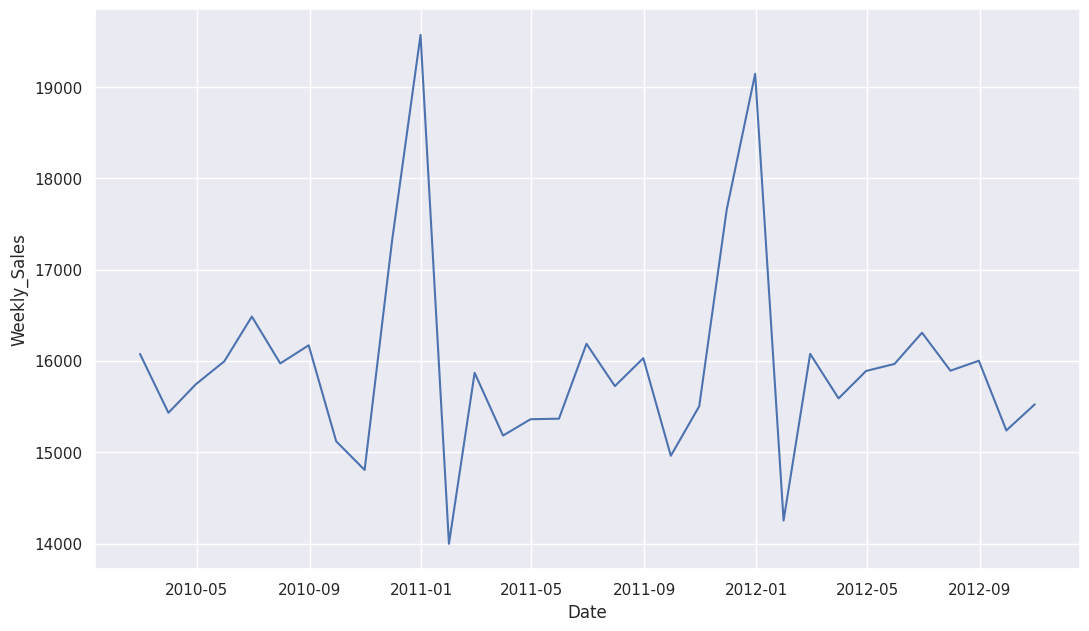

In [43]:
seaborn.set(rc={'figure.figsize':(12.7,7.27)})
seaborn.lineplot(resam.Weekly_Sales)
plt.show()

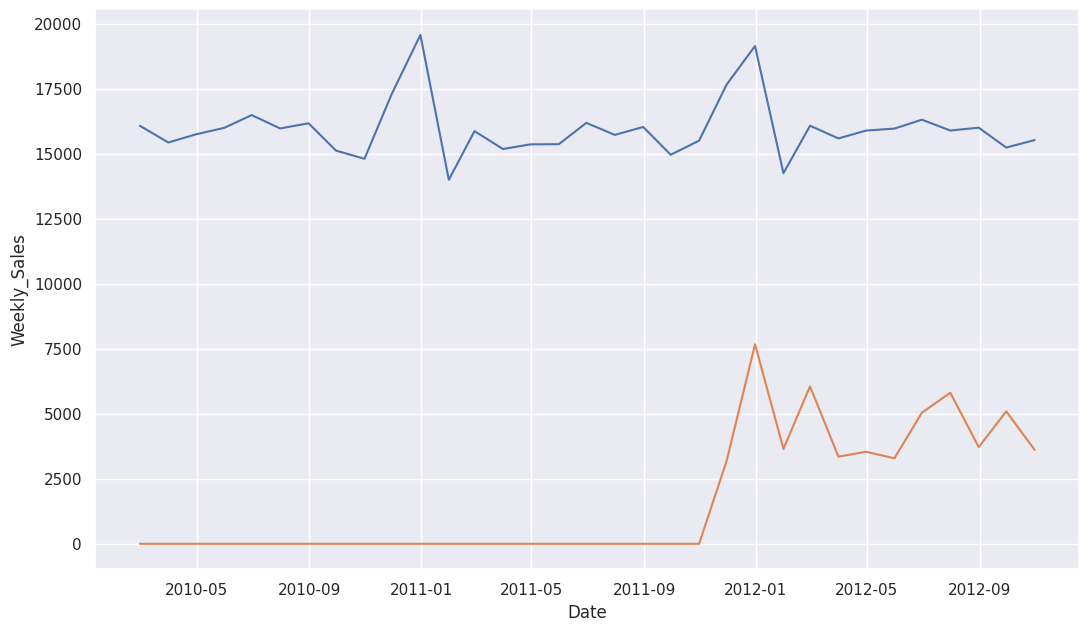

In [44]:
seaborn.lineplot(resam.Weekly_Sales, legend="auto")
seaborn.lineplot(resam.MarkDown5, legend="auto")
plt.show()

In [45]:
resam_corr = resam.corr()

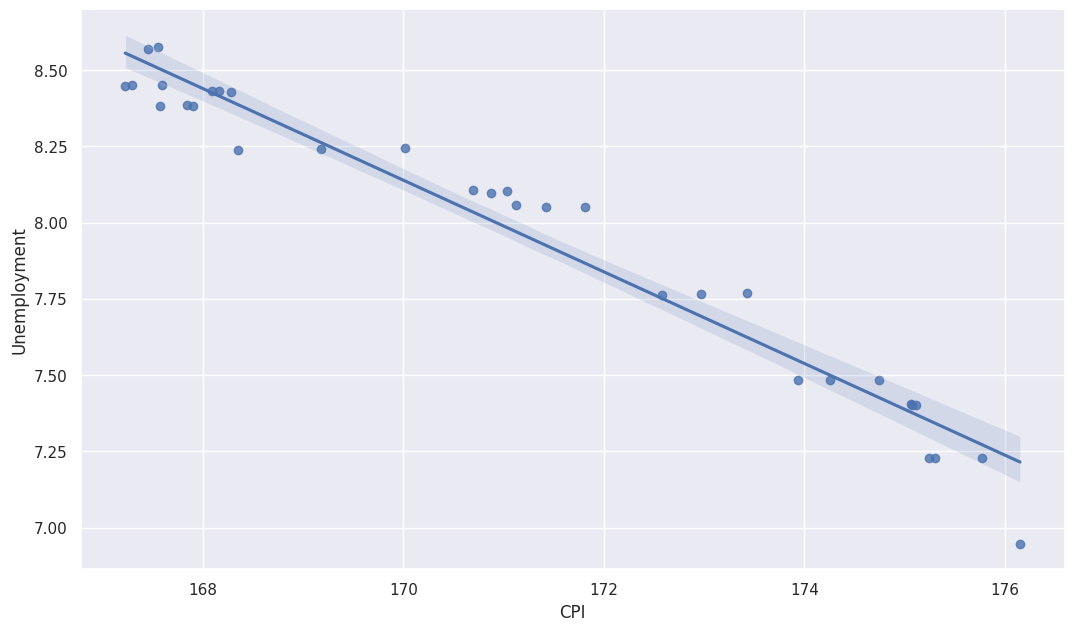

In [46]:
seaborn.regplot(x=resam.CPI, y=resam.Unemployment, data=resam)
plt.show()

In [47]:
average_sales_month = entire_store.groupby(["month", "year"]).mean()
average_sales_month.reset_index(inplace=True)

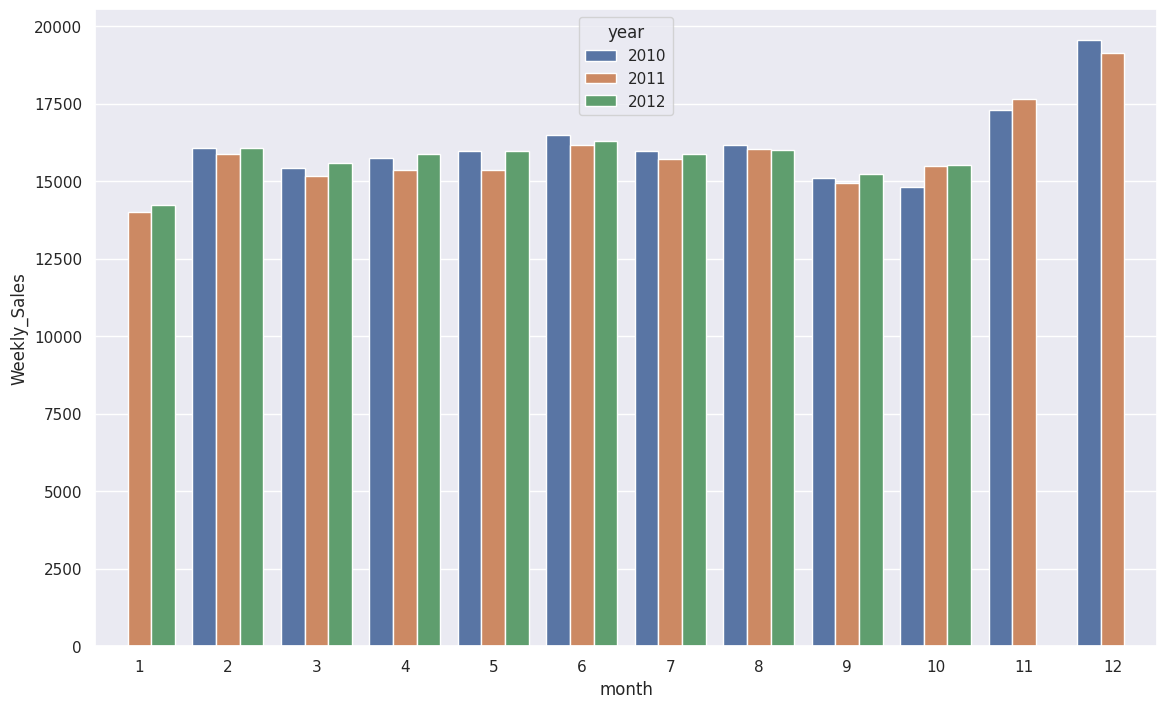

In [48]:
seaborn.set(rc={'figure.figsize':(13.7,8.27)})
seaborn.barplot(data=average_sales_month, x="month", y="Weekly_Sales", hue="year")
plt.show()

In [49]:
set_holidays(entire_store)
# map_type_cat_reverse(entire_store)
entire_store["AHoliday"] = entire_store["AHoliday"].apply(lambda x: 1 if x == True else 0)

In [50]:
type_one_hot = pandas.get_dummies(entire_store["Type"])
type_one_hot.reset_index(inplace=True)
entire_store.reset_index(inplace=True)

In [51]:
type_one_hot.shape

(421570, 4)

In [52]:
entire_store["A"] = type_one_hot.A
entire_store["B"] = type_one_hot.B
entire_store["C"] = type_one_hot.C
entire_store.head()

,Date,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,Type,Size,year,month,week,AHoliday,Sales_Holidays,A,B,C
0,2010-02-05,1,1,24924.50,False,42.31,2.572,0.0,0.0,0.0,...,A,151315,2010,2,5,0,NaN,1,0,0
1,2010-02-05,1,2,50605.27,False,42.31,2.572,0.0,0.0,0.0,...,A,151315,2010,2,5,0,NaN,1,0,0
2,2010-02-05,1,3,13740.12,False,42.31,2.572,0.0,0.0,0.0,...,A,151315,2010,2,5,0,NaN,1,0,0
3,2010-02-05,1,4,39954.04,False,42.31,2.572,0.0,0.0,0.0,...,A,151315,2010,2,5,0,NaN,1,0,0
4,2010-02-05,1,5,32229.38,False,42.31,2.572,0.0,0.0,0.0,...,A,151315,2010,2,5,0,NaN,1,0,0


In [53]:
entire_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 24 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Date            421570 non-null  datetime64[ns]
 1   Store           421570 non-null  int64         
 2   Dept            421570 non-null  int64         
 3   Weekly_Sales    421570 non-null  float64       
 4   IsHoliday       421570 non-null  bool          
 5   Temperature     421570 non-null  float64       
 6   Fuel_Price      421570 non-null  float64       
 7   MarkDown1       421570 non-null  float64       
 8   MarkDown2       421570 non-null  float64       
 9   MarkDown3       421570 non-null  float64       
 10  MarkDown4       421570 non-null  float64       
 11  MarkDown5       421570 non-null  float64       
 12  CPI             421570 non-null  float64       
 13  Unemployment    421570 non-null  float64       
 14  Type            421570 non-null  obj

In [54]:
# predictors = ["Date","Store", "Dept","Temperature", "Fuel_Price", "CPI", "Weekly_Sales",
#                      "Unemployment", "Size", "year", "month", "week", "AHoliday", "A", "B", "C"]

predictors = ["Date","Store", "Dept", "Weekly_Sales", "month",
                     "Size", "year", "week", "AHoliday", "A", "B", "C"]

In [55]:
train_data = entire_store[predictors].copy()
# train_y = entire_store.Weekly_Sales.copy()

In [56]:
train_data["Date"] = pandas.to_datetime(train_data["Date"], infer_datetime_format=True)
train_data.set_index(keys="Date", inplace=True)
train_x = train_data.loc[:"2012-02",:].copy()
val_x = train_data.loc["2012-03":,:].copy()

/home/vhyne/anaconda3/envs/TF-py/lib/python3.7/site-packages/pandas/core/indexing.py:1109: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  return self._getitem_tuple_same_dim(tup)


In [57]:
def get_x_y(df: pandas.DataFrame):
    df.reset_index(inplace=True)
    y = df.Weekly_Sales
    df.drop(columns=["Weekly_Sales", "Date"], inplace=True)
    df["week"] = df["week"].astype(dtype=int)
    df["A"] = df["A"].astype(dtype=int)
    df["B"] = df["B"].astype(dtype=int)
    df["C"] = df["C"].astype(dtype=int)
    return y

In [58]:
train_y = get_x_y(train_x)
val_y = get_x_y(val_x)

In [59]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317928 entries, 0 to 317927
Data columns (total 10 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   Store     317928 non-null  int64
 1   Dept      317928 non-null  int64
 2   month     317928 non-null  int64
 3   Size      317928 non-null  int64
 4   year      317928 non-null  int64
 5   week      317928 non-null  int64
 6   AHoliday  317928 non-null  int64
 7   A         317928 non-null  int64
 8   B         317928 non-null  int64
 9   C         317928 non-null  int64
dtypes: int64(10)
memory usage: 24.3 MB


In [60]:
model = XGBRegressor(n_estimators=100, max_depth=11)
model.fit(train_x, train_y)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
       colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
       early_stopping_rounds=None, enable_categorical=False,
       eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
       importance_type=None, interaction_constraints='',
       learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
       max_delta_step=0, max_depth=11, max_leaves=0, min_child_weight=1,
       missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
       num_parallel_tree=1, objective='reg:squarederror', predictor='auto',
       random_state=0, reg_alpha=0, reg_lambda=1,
       sampling_method='uniform', scale_pos_weight=1, subsample=1,
       tree_method='exact', validate_parameters=1, verbosity=None)

In [62]:
predictions = model.predict(val_x)

In [63]:
rmse = numpy.sqrt(mean_squared_error(val_y, predictions))
mae = mean_absolute_error(val_y, predictions)
print(f"RMSE: {rmse}\nMAE: {mae}")

RMSE: 3366.7640796329893
MAE: 1644.408867714923


In [65]:
predictions_2 = model.predict(train_x)
rmse_2 = numpy.sqrt(mean_squared_error(train_y, predictions_2))
mae_2 = mean_absolute_error(train_y, predictions_2)
print(f"RMSE: {rmse_2}\nMAE: {mae_2}")

RMSE: 1603.893373215242
MAE: 923.4980176085656


In [66]:
prediction_frame = pandas.DataFrame({"Prediction": predictions, "Real": val_y.values})

In [67]:
prediction_frame.head(10)

,Prediction,Real
0,20634.212891,20113.03
1,50437.667969,52608.51
2,10742.134766,11387.31
3,36146.945312,38459.98
4,30960.441406,30642.53
5,3602.229004,6464.52
6,17604.132812,16473.91
7,36327.031250,40307.19
8,27284.730469,30503.30
9,35865.476562,39036.14


In [68]:
model_2 = RandomForestRegressor(n_estimators=58, max_depth=27, max_features=6, min_samples_split=3,
                                min_samples_leaf=1)
model_2.fit(train_x, train_y)

/home/vhyne/anaconda3/envs/TF-py/lib/python3.7/site-packages/sklearn/utils/fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=27,
           max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=3, min_weight_fraction_leaf=0.0,
           n_estimators=58, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

In [69]:
predictions_3 = model_2.predict(train_x)
rmse_3 = numpy.sqrt(mean_squared_error(train_y, predictions_3))
mae_3 = mean_absolute_error(train_y, predictions_3)
print(f"RMSE: {rmse_3}\nMAE: {mae_3}")

/home/vhyne/anaconda3/envs/TF-py/lib/python3.7/site-packages/sklearn/ensemble/base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
/home/vhyne/anaconda3/envs/TF-py/lib/python3.7/site-packages/sklearn/utils/fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


RMSE: 1650.091135410578
MAE: 705.2955085602748


In [70]:
predictions_4 = model_2.predict(val_x)
rmse_4 = numpy.sqrt(mean_squared_error(val_y, predictions_4))
mae_4 = mean_absolute_error(val_y, predictions_4)
print(f"RMSE: {rmse_4}\nMAE: {mae_4}")

/home/vhyne/anaconda3/envs/TF-py/lib/python3.7/site-packages/sklearn/ensemble/base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
/home/vhyne/anaconda3/envs/TF-py/lib/python3.7/site-packages/sklearn/utils/fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


RMSE: 3334.387202346343
MAE: 1551.4523146032063
